In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [7]:
data.head(4)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101


In [8]:
#EDA

In [9]:
#lets check all the columns and data type of each.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


We See there are no string dtype, each columns has 30 data in it and all has int64 datatype except for column ERA(Earned Run Average) which has float64 datatype.

In [10]:
#Lets check for null values now

data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

With the Observation we see that there are no null values in the dataset.

In [11]:
#Lets check how the data is distributed

data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


With the above we see how the data is distributed and see the mean, standard deviation, percentage of value falling under 25%,50%,75%, Min Value, Max Value of each column.

In [12]:
#Lets check the shape of dataset now.

data.shape

(30, 17)

We see that there are 30 rows and 17 columns in the dataset.

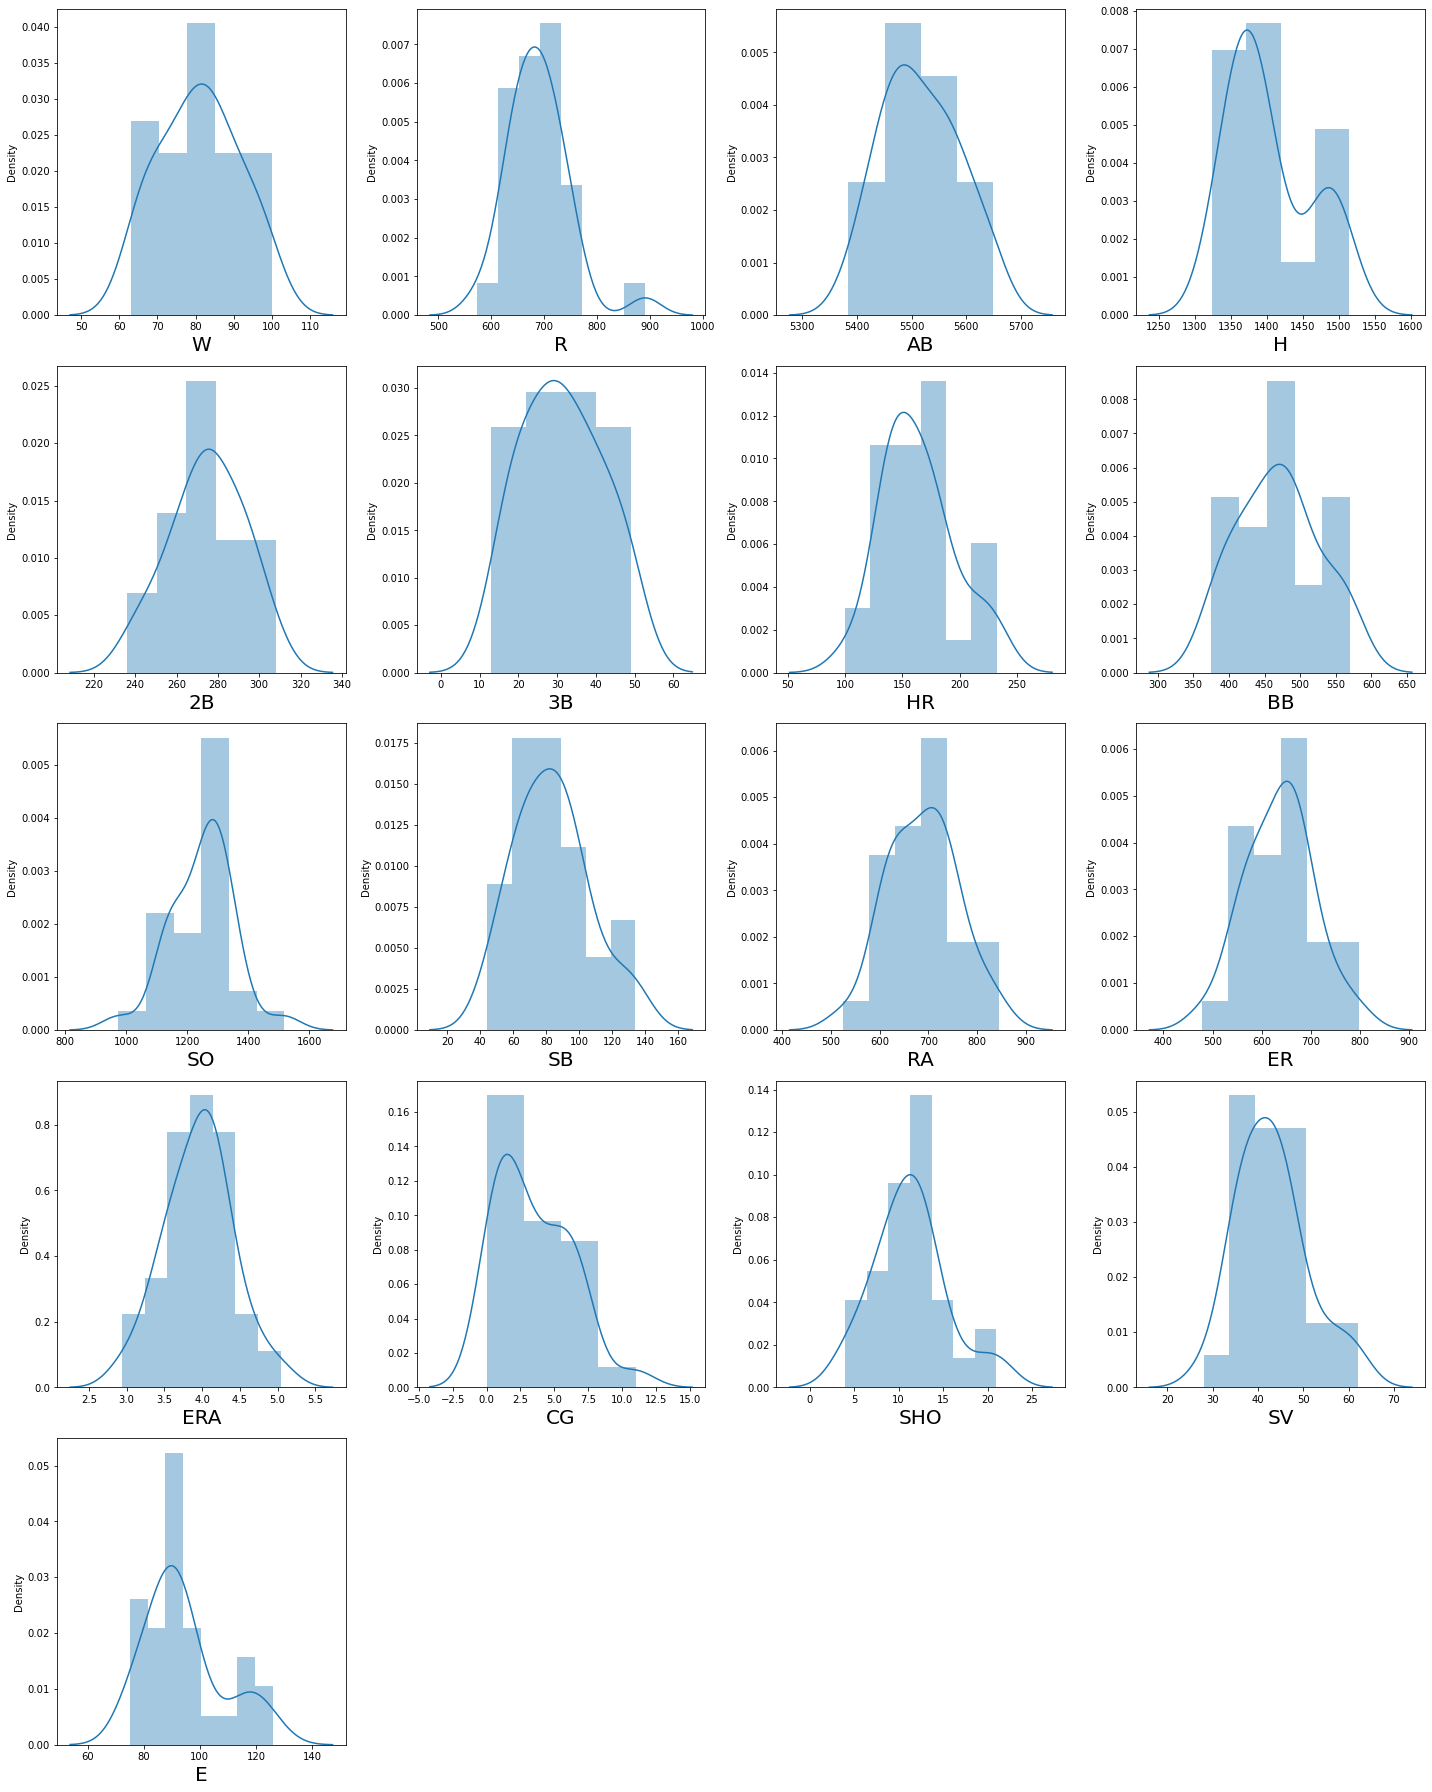

In [13]:
#Plotting dist plot to check for skewness

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=17:
        ax=plt.subplot(5,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize= 20)
        
    plotnumber+=1
plt.tight_layout()    

In [14]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

With the above plots and method it looks like there is little bit of skewness in the columns: R(runs), CG(Complete Games)  and E(Errors).

In [15]:
#We will proceed ahead and check the relation of each feature with the label to see if they are positively related or not.

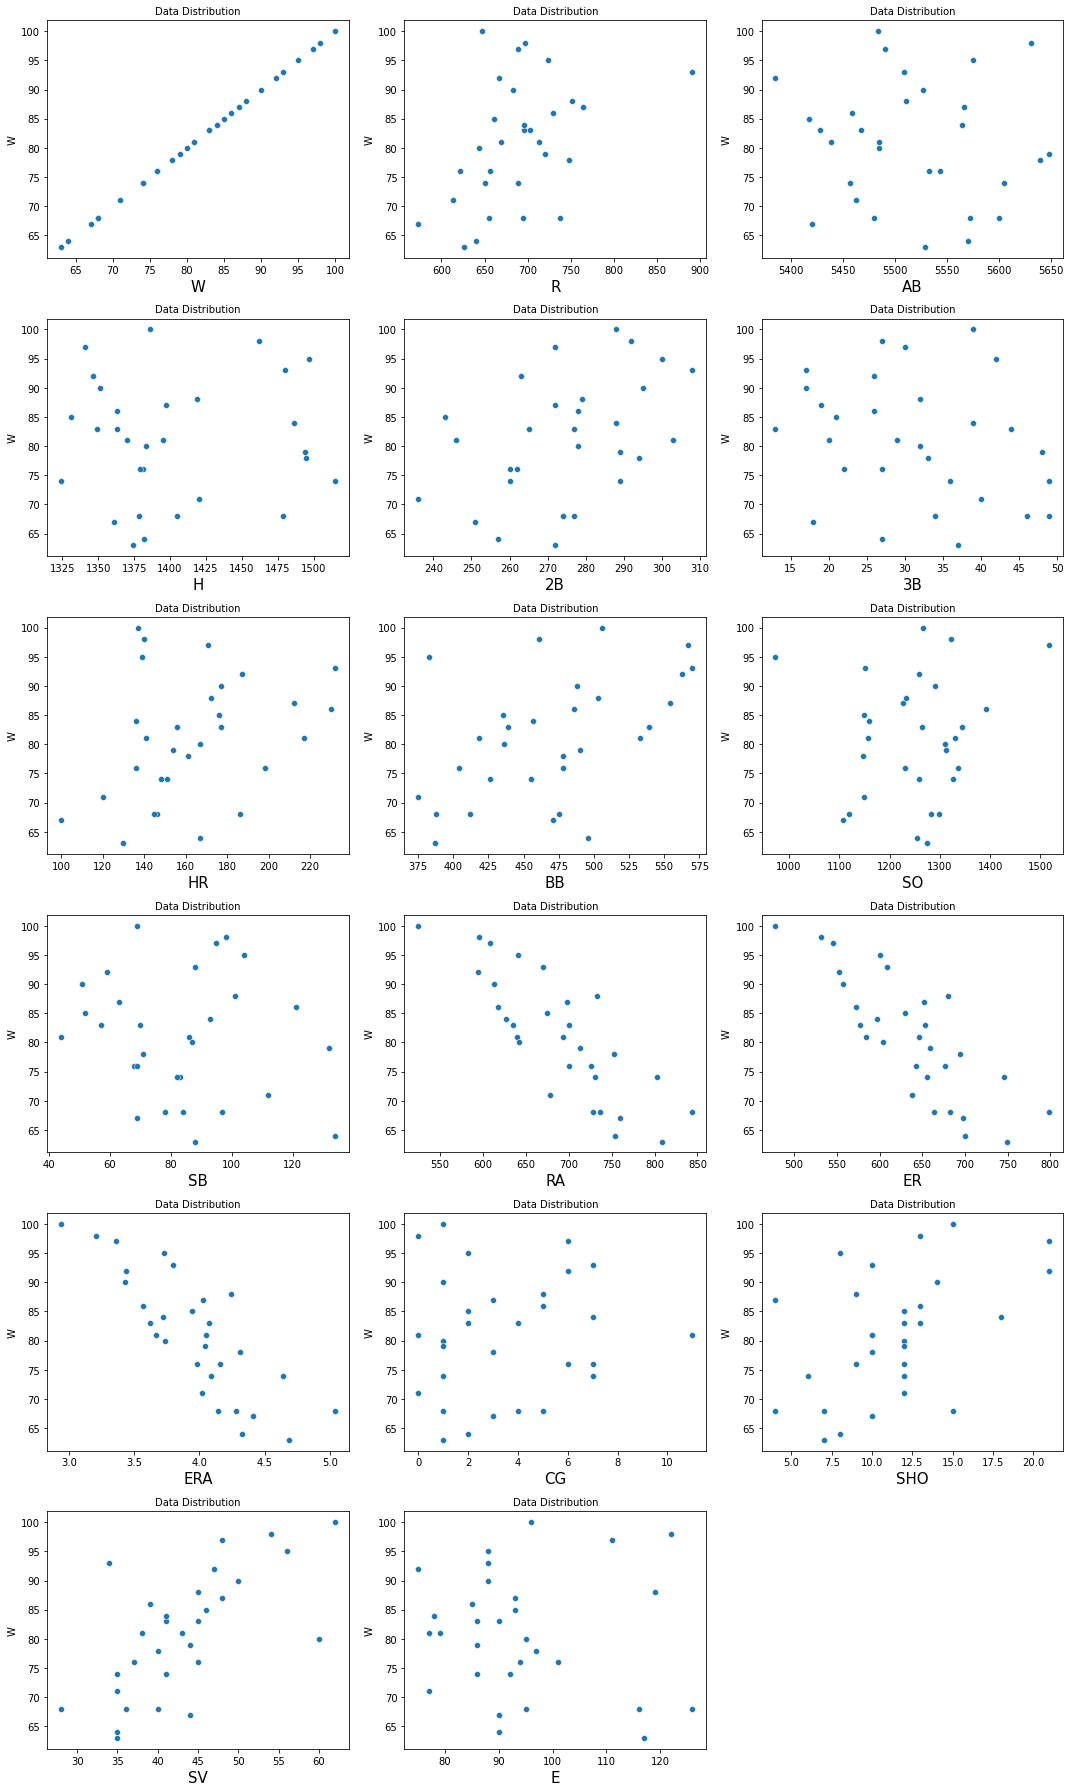

In [16]:
#Plotting scatter plot to see the relation of features with label

plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.scatterplot(x = data[column], y= data['W'])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

Observations from the above plotting.

1 -R(Runs), 2B(Doubles), HR(Homeruns), BB(Walks), SO(Strikeouts), CG(Complete Games),SHO(Shutouts),SV(Saves) seems to have possitive relation  With  W(Wins).(As these increases wins also increases).

2 - With Ab(Atbats), H(Hits), 3B(Triples), SB(Stolen Bases), E(Errors)  W(Wins) seems to have very less positive relation as datapoints are scatterred all over the graph.(These contiribute very less in Wins)

3 - RA(Runs Allowed), ER(Earned Runs), ERA(Earned Run Average) have negative relation with Wins.(With increase in these Wins Decreases)

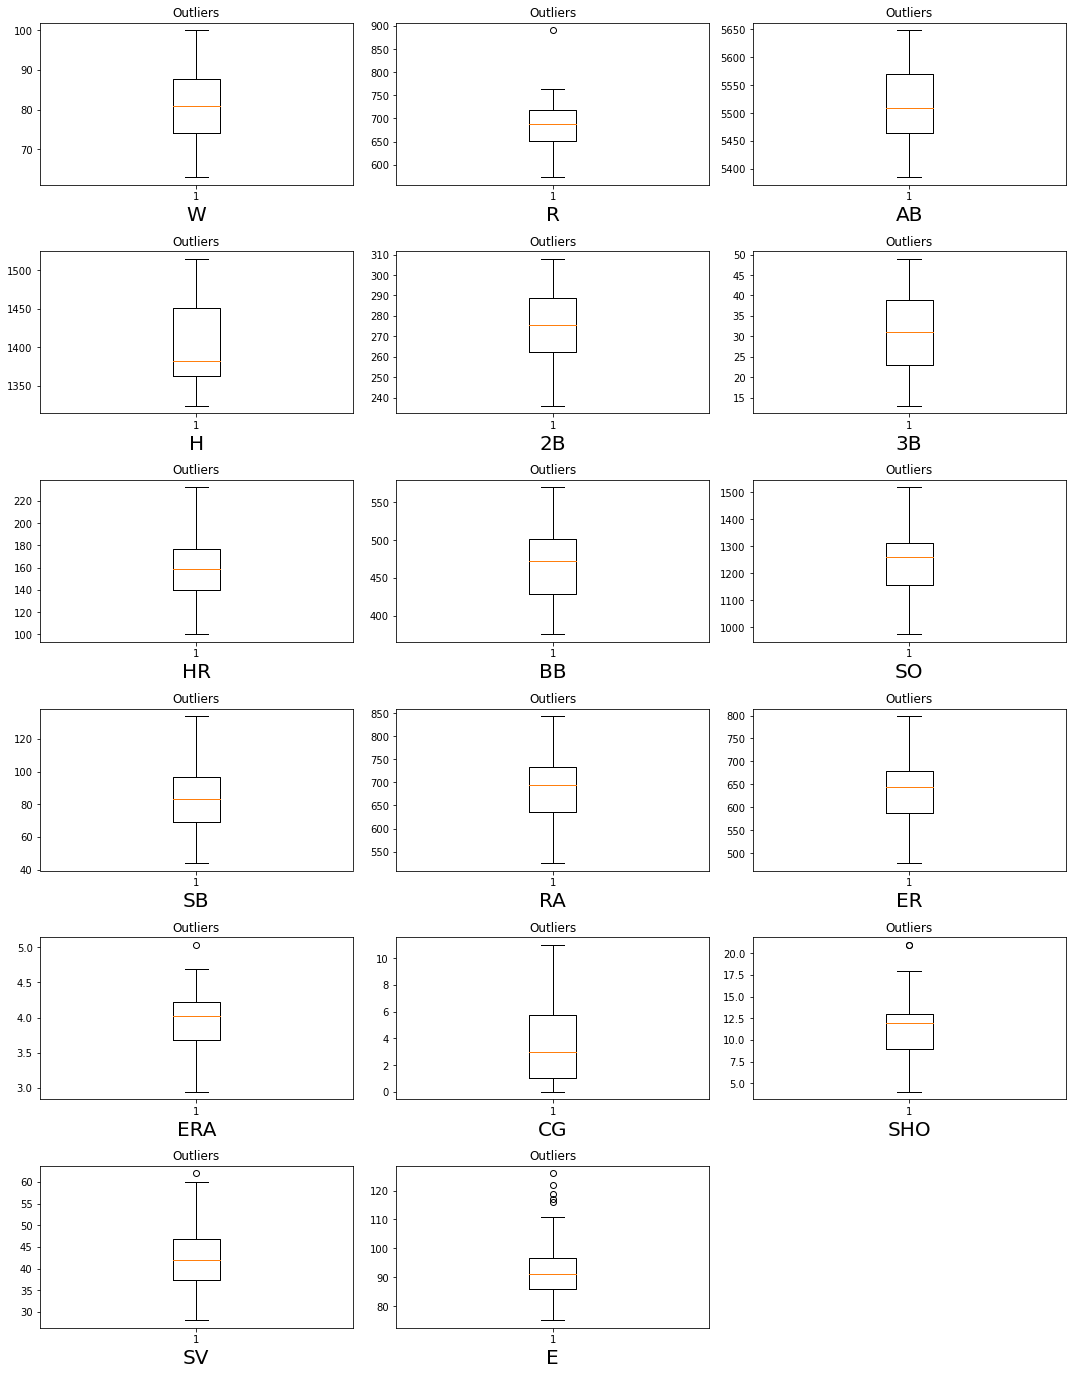

In [24]:
#Checking for outliers
plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(8,3,plotnumber)
        plt.boxplot(data[column])
        plt.xlabel(column, fontsize=20)
        plt.title('Outliers')
    
    plotnumber +=1
plt.tight_layout()

With the help of above plotting we can see that there are too many outliers in the column E(Error), and very less in ERA(Earned Run Average), SHO(Shutouts), SV(Saves).

In [25]:
#Now will check the collinearity among features with the help of heatmap.

In [26]:
corr_mat = data.corr()
corr_mat

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


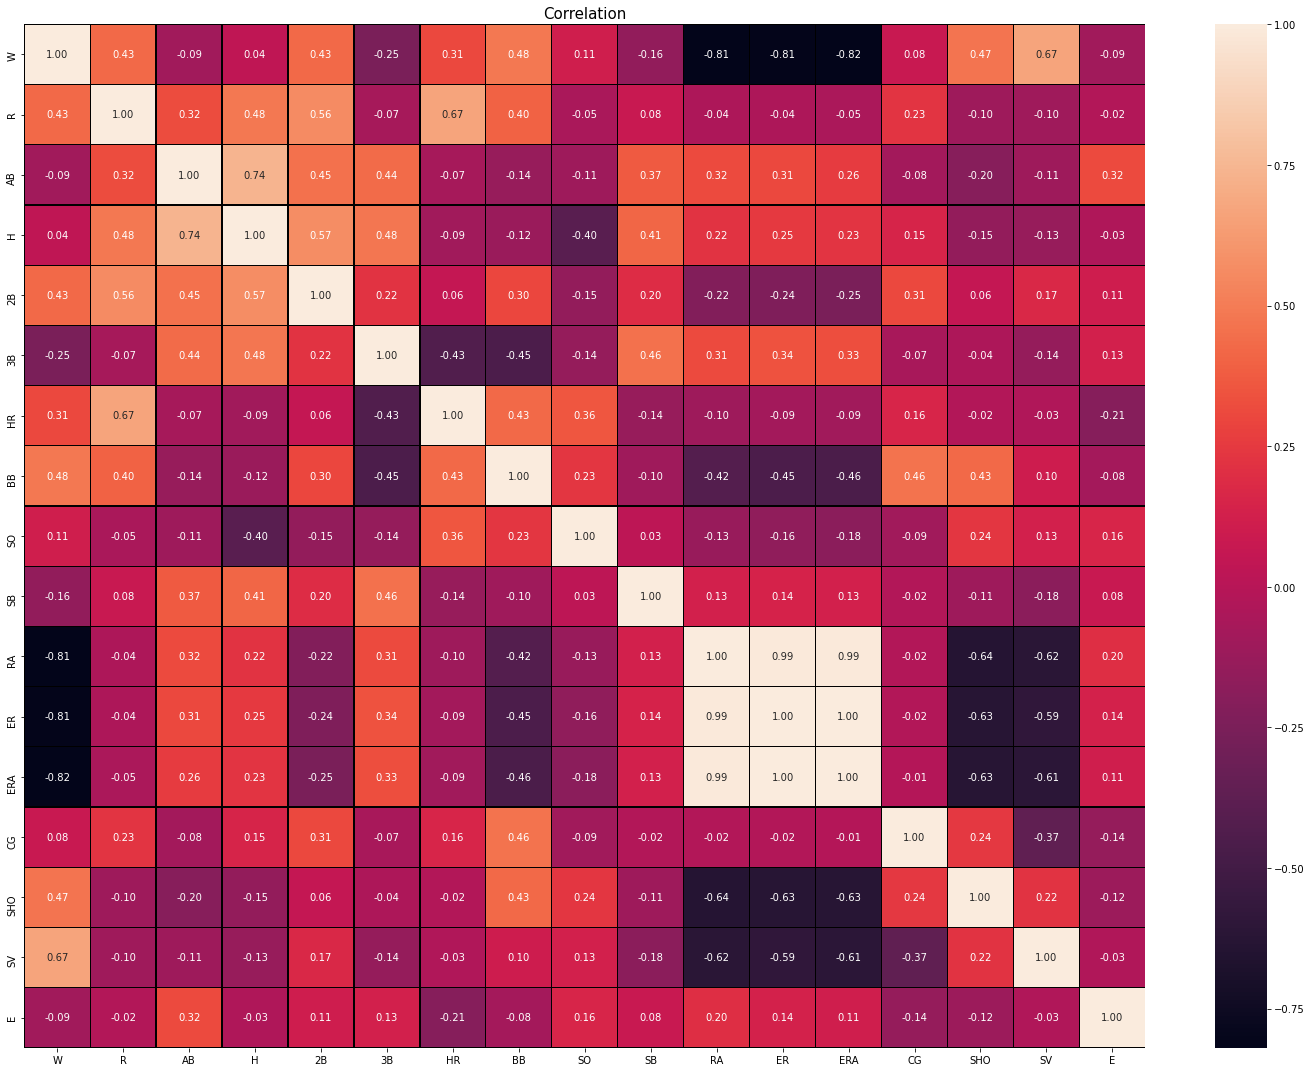

In [27]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

With the heatmap we found that ERA(Earned Run Average) and ER(Earned Runs) are completely co-related with each other and both of these has very high correlation with the column RA(Runs Allowed) which is 99% and they both are negativily corelated with label W(Wins).

Wins has Minimum Correlation with the column : ERA(Earned Run Average) - (-82%)

Wins has Maximum Correlation with the column : SV(Saves) - (67%)

#### We will remove the columns ER(Earned Runs) And ERA(Earned Run Average)

as they are completely correlated with each other and highly correlated with RA also both of these are negatively correlated with the label WINS

ERA has little bit of  outliers in it and both have little bit of skewness as well.

In [17]:
#Dropping the columns ER(Earned Runs) And ERA(Earned Run Average)

data.drop(['ER','ERA'], axis = 1, inplace = True)

In [18]:
#Lets check the dataframe
data.shape

(30, 15)

Now we have 30 rows and 15 columns

### Removing Outliers:

In [19]:
#Let us now remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[1.36540860e+00 6.19077968e-01 8.47731264e-01 1.66368512e+00
  1.42017307e+00 1.04119304e+00 7.87298598e-01 1.53490242e+00
  2.69762957e+00 9.13883291e-01 6.66233927e-01 5.39806195e-01
  8.14628593e-01 1.67160651e+00 4.61469635e-01]
 [1.97838300e-01 1.34431656e-01 7.11093535e-01 9.70680764e-01
  1.27403389e-01 1.23580856e+00 2.43966683e-01 5.36591904e-01
  1.54878442e-01 6.01825582e-01 1.65970766e-01 5.39806195e-01
  1.72800005e-01 2.49879323e-01 6.07196888e-01]
 [3.24325082e-03 3.32905860e-01 1.11523330e+00 1.51891367e-01
  1.58879521e+00 2.23807850e-01 7.23377196e-01 1.13914361e+00
  8.93981893e-01 1.11449182e-01 6.80339091e-01 2.77264091e+00
  3.20914294e-01 6.54856158e-01 1.11724227e+00]
 [4.83244373e-01 1.14641931e+00 2.41521620e-01 4.01088140e-01
  8.28122030e-01 4.18423371e-01 8.83180700e-01 1.16053598e+00
  1.68601848e-01 6.90984928e-01 1.80075931e-01 1.30044220e+00
  5.67771443e-01 7.84104084e-01 4.85757510e-01]
 [6.77839422e-01 1.32700776e-02 1.28073815e+00 1.98408098e+00
  

In [20]:
#Storing the zcore > 3 in i

i = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

new_data = data.drop(data.index[i])

### Removing Skewness :

In [21]:
#With the help of power transform method we will remove skewness from the entire dataset.

#let's first separate label and features in x and y variable.

x = new_data.drop(['W'], axis = 1)
y = new_data['W']

In [22]:
#Importing Power Transform to remove skewness from the entire dataset

from sklearn.preprocessing import power_transform

# Applying it on X to remove the skewness from features.

x = power_transform(x, method='yeo-johnson')

x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -3.07098204e-01, -7.87002186e-01,
         1.53275292e+00, -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01, -3.07098204e-01,  2.36736538e-01,
         3.12020186e-01, -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01,  2.01131531e+00, -2.52844176e-01,
        -6.64136739e-01, -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e+00,  0.00000000e+00,
        -8.37664770e-01, -4.32227907e-01, -8.60039342e-01,
        -1.16272085e+00, -2.30682707e-01, -6.

### Model Building :

In [23]:
# Import Standard Scaler to scale the data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [26]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [27]:
#Importing Train Test Split to train and test the model

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=900)

In [30]:
#Now Model Initiating and Training

In [31]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
SVR = SVR()

In [32]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
SVR.fit(x_train,y_train)
print("All Models Trained")

All Models Trained


In [33]:
#Prediction Scores for each trained model

In [34]:
LR.score(x_test,y_test)

0.0043596852372428385

In [35]:
DT.score(x_test,y_test)

0.40215113842715466

In [36]:
RF.score(x_test,y_test)

0.7745538762396981

In [37]:
SVR.score(x_test,y_test)

0.12729473904967337

In [38]:
#With the above adjusted r2 score of all the models we see that RandomForestRegressor is giving us the best prediction.

In [39]:
#Now will check the mean squared error of each trained model.

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
y_pred1=LR.predict(x_test)
y_pred2 =DT.predict(x_test)
y_pred3=RF.predict(x_test)
y_pred4=SVR.predict(x_test)

In [42]:
mean_squared_error(y_test,y_pred1) # For the linear regression model

111.37170333416529

In [43]:
mean_squared_error(y_test,y_pred2) #For the Decision Tree Regressor Model

66.875

In [44]:
mean_squared_error(y_test,y_pred3) # For the random forest regressor model

25.21826250000002

In [45]:
mean_squared_error(y_test,y_pred4) #For support vector regressor model.

97.62026504911545

It has become quite clear with the above scores that RandomForestRegressor is best fit for this model as the mean_squared_error of it is least as compared with all others models

### Cross Validation:

In [46]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

-0.07078982244241436

### HyperParameter Tuning:

In [47]:
##Doing hyper parameter tuning for it

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
params = {'n_estimators':[110,160,170],
         'max_depth':[30,31,26],
         'min_samples_leaf': [4,2,3],
         'min_samples_split': [2,5,3]}

In [50]:
grid = GridSearchCV(RF, param_grid= params, cv= 8, n_jobs=-1)

In [51]:
grid.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [30, 31, 26],
                         'min_samples_leaf': [4, 2, 3],
                         'min_samples_split': [2, 5, 3],
                         'n_estimators': [110, 160, 170]})

In [52]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'max_depth': 31, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 170}


In [53]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [54]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=31, min_samples_leaf=4, n_estimators=170)

In [55]:
y_pred =  clf.predict(x_test)

In [56]:
mean_squared_error(y_test,y_pred)

36.630521797560235

In [57]:
clf.score(x_test,y_test)

0.672530605525373

In [58]:
mean_absolute_error(y_test,y_pred)

4.65318405654803

In [59]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.052315407970758

In [60]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

-0.054952647690139675

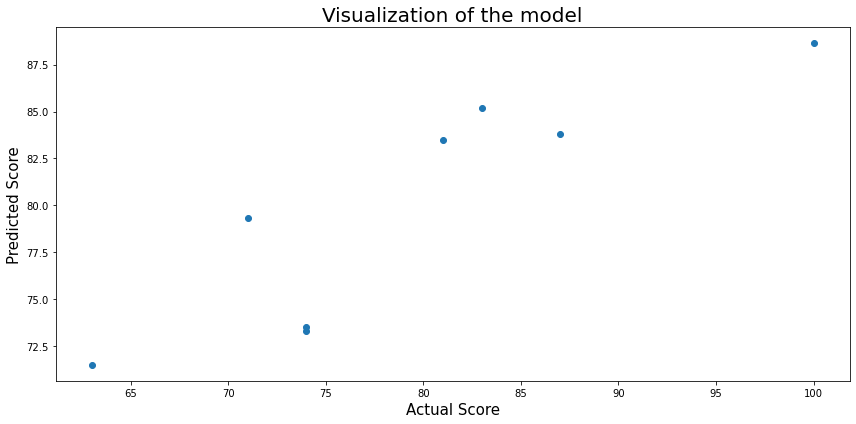

In [61]:
plt.figure(figsize = [12,6])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

In [62]:
#Saving the model

In [63]:
import joblib

In [64]:
filename = 'Baseball_CaseStudy_RegressionModel.sav'
joblib.dump(clf, filename)

['Baseball_CaseStudy_RegressionModel.sav']